<a href="https://colab.research.google.com/github/raaz0000002/pytorch_learning/blob/main/CourseERA_Copy_of_Deep_Learning_with_PyTorch_ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Set up colab gpu runtime environment

In [1]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# Download Dataset

original author of the dataset :
https://github.com/VikramShenoy97/Human-Segmentation-Dataset


In [2]:
!git clone https://github.com/parth1620/Human-Segmentation-Dataset-master.git

Cloning into 'Human-Segmentation-Dataset-master'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (592/592), done.
remote: Compressing objects: 100% (591/591), done.
remote: Total 592 (delta 3), reused 588 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (592/592), 13.60 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (3/3), done.


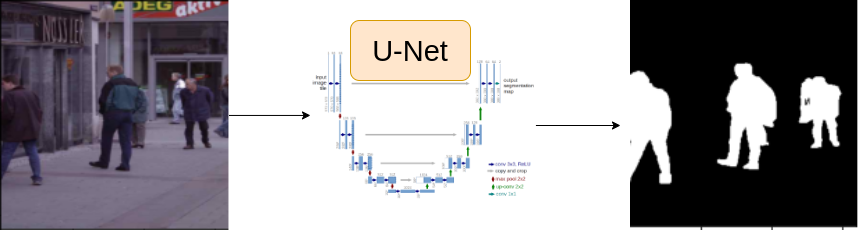

# Some Common Imports

In [3]:
import sys
sys.path.append('/content/Human-Segmentation-Dataset-master')

In [4]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import helper

# Task : 2 Setup Configurations

In [5]:
CSV_FILE = '/content/Human-Segmentation-Dataset-master/train.csv'
DATA_DIR = '/content/'
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

EPOCHS = 25
LR = 0.003
IMG_SIZE = 320
BATCH_SIZE = 16

ENCODER = 'timm-efficientnet-b0'
WEIGHTS = 'imagenet'

# REMOTE CONTROLS OF THE PROJECT

In [6]:
df = pd.read_csv(CSV_FILE)
df.head()

,masks,images
0,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
1,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
2,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
3,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...
4,Human-Segmentation-Dataset-master/Ground_Truth...,Human-Segmentation-Dataset-master/Training_Ima...


In [7]:
row = df.iloc[0]

image_path = row.images
mask_path = row.masks

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) / 255.0

print(f"Image Shape : {image.shape}")
print(f"Mask Shape : {mask.shape}")

Image Shape : (183, 276, 3)
Mask Shape : (183, 276)


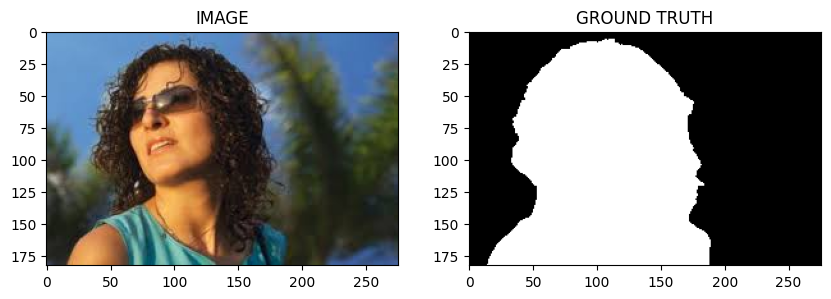

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('GROUND TRUTH')
ax2.imshow(mask,cmap = 'gray')

In [9]:
train_df , valid_df = train_test_split(df,test_size = 0.2 ,random_state = 42)

# Task 3 : Augmentation Functions

albumentation documentation : https://albumentations.ai/docs/

In [10]:
# to bring variety in the dataset (if rotations and all vayo vanepani data change nahos vanera)
# when augmentation is applied on images, same happens with masks

import albumentations as A



In [11]:
def get_train_augs():
  return A.Compose([
      A.Resize(IMG_SIZE, IMG_SIZE),
      A.HorizontalFlip(p = 0.5),
      A.VerticalFlip(p = 0.5)
  ])

def get_valid_augs():
  return A.Compose([
      A.Resize(IMG_SIZE, IMG_SIZE)
  ])

# Task 4 : Create Custom Dataset

In [12]:
from torch.utils.data import Dataset

In [13]:
from torch.utils.data import Dataset
import cv2
import numpy as np
import torch
from albumentations import Compose, Resize, RandomCrop, HorizontalFlip, VerticalFlip, RandomBrightnessContrast, Normalize, OneOf
from albumentations.pytorch import ToTensorV2

class SegmentationDataset(Dataset):
    def __init__(self, df, augmentations):
        self.df = df
        self.augmentations = augmentations

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        image_path = row.images  # Access image path from 'images' column
        mask_path = row.masks   # Access mask path from 'masks' column

        # Load image and mask
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Shape: (H, W, 3)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Shape: (H, W)
        mask = np.expand_dims(mask, axis=-1)  # Shape: (H, W, 1)

        # Ensure image and mask have the same dimensions
        image = cv2.resize(image, (mask.shape[1], mask.shape[0]))

        # Apply augmentations in HWC format
        if self.augmentations:
            data  = self.augmentations(image=image, mask=mask)
            image = data["image"]
            mask = data["mask"]

        # Convert image and mask to CHW
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)  # (3, H, W)
        mask = np.transpose(mask, (2, 0, 1)).astype(np.float32)    # (1, H, W)

        # Normalize image, binarize mask
        image = torch.Tensor(image) / 255.0
        mask = torch.round(torch.Tensor(mask) / 255.0)
         # If mask is binary (0 and 255), round to get 0 or 1

        return image, mask

In [14]:
trainset = SegmentationDataset(train_df, get_train_augs())
validset = SegmentationDataset(valid_df, get_valid_augs())

In [15]:
print(f"Size of Trainset : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

Size of Trainset : 232
Size of Validset : 58


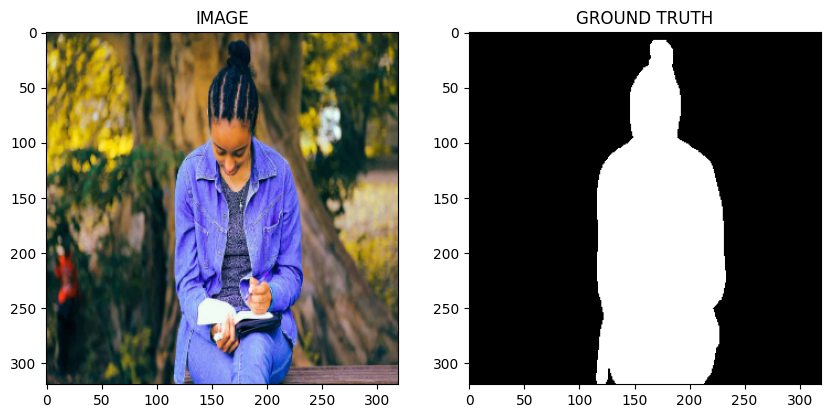

In [16]:
idx = 30
image , mask = trainset[idx]
helper.show_image(image,mask)

# Task 5 : Load dataset into batches

In [17]:
# using dataLoader

from torch.utils.data import DataLoader


In [18]:
trainloader = DataLoader(trainset , batch_size = BATCH_SIZE, shuffle = True)
Validloader = DataLoader (validset , batch_size = BATCH_SIZE)

In [19]:
print(f" total number of batches in trainloader: {len(trainloader)}")
print(f" total number of batches in trainloader: {len(Validloader)}")

 total number of batches in trainloader: 15
 total number of batches in trainloader: 4


In [20]:
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)


Image shape: torch.Size([3, 320, 320])
Mask shape: torch.Size([1, 320, 320])


In [21]:
for image, mask in trainloader :
  break


  print(f" one batch image shape : {image.shape}")
  print(f" one batch mask shape : {mask.shape}")

# Task 6 : Create Segmentation Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [24]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [26]:
class SegmentationModel(nn.Module):

  def __init__(self):
    super(SegmentationModel,self).__init__()

    self.arc = smp.Unet(
        encoder_name = ENCODER,
        encoder_weights = WEIGHTS,
        in_channels = 3,
        classes = 1,
        activation = None
    )

  def forward(self,images,masks = None):
    logits = self.arc(images)

    if masks != None:
      loss1 = DiceLoss(mode = 'binary')(logits,masks)
      loss2 = nn.BCEWithLogitsLoss()(logits,masks)
      return logits,loss1 + loss2
    return logits




In [27]:

model = SegmentationModel()
model.to(DEVICE)

SegmentationModel(
  (arc): Unet(
    (encoder): EfficientNetEncoder(
      (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): Swish()
      )
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn1): BatchNormAct2d(
              32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): Swish()
            )
            (aa): Identity()
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (act1): Swish()
              (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoi

# Task 7 : Create Train and Validation Function

In [47]:
from tqdm import tqdm

def train_fn(data_loader, model, optimizer, DEVICE):
    model.train()
    total_loss = 0.0

    for images, masks in tqdm(data_loader):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        optimizer.zero_grad()
        logits, loss = model(images, masks)
        loss.backward()
        optimizer.step()


        total_loss += loss.item()

    return total_loss / len(data_loader)


In [48]:
def eval_fn(data_loader, model):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for images, masks in tqdm(data_loader):
            images = images.to(DEVICE)
            masks = masks.to(DEVICE)

            logits, loss = model(images, masks)

            total_loss += loss.item()

    return total_loss / len(data_loader)


# Task 8 : Train Model

In [49]:
optimizer = torch.optim.Adam(model.parameters(),lr = LR)

In [51]:
best_valid_loss = np.inf

for i in range(EPOCHS):
    train_loss = train_fn(trainloader, model, optimizer,DEVICE)
    valid_loss = eval_fn(Validloader, model)

    if valid_loss < best_valid_loss:
        torch.save(model.state_dict(), 'best_model.pth')
        print("Best model saved.")
        best_valid_loss = valid_loss

    print(f"Epoch {i+1}: Train Loss = {train_loss:.4f}, Valid Loss = {valid_loss:.4f}")


100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


Best model saved.
Epoch 1: Train Loss = 0.7806, Valid Loss = 1.8083


100%|██████████| 4/4 [00:00<00:00,  5.24it/s]


Best model saved.
Epoch 2: Train Loss = 0.3572, Valid Loss = 0.4455


100%|██████████| 4/4 [00:00<00:00,  5.76it/s]


Epoch 3: Train Loss = 0.3621, Valid Loss = 0.6526


100%|██████████| 4/4 [00:00<00:00,  5.41it/s]


Best model saved.
Epoch 4: Train Loss = 0.3190, Valid Loss = 0.2968


100%|██████████| 4/4 [00:00<00:00,  5.72it/s]


Best model saved.
Epoch 5: Train Loss = 0.2497, Valid Loss = 0.2458


100%|██████████| 4/4 [00:00<00:00,  5.71it/s]


Best model saved.
Epoch 6: Train Loss = 0.2092, Valid Loss = 0.2211


100%|██████████| 4/4 [00:00<00:00,  5.82it/s]


Best model saved.
Epoch 7: Train Loss = 0.1663, Valid Loss = 0.1903


100%|██████████| 4/4 [00:00<00:00,  5.69it/s]


Epoch 8: Train Loss = 0.1606, Valid Loss = 0.1971


100%|██████████| 4/4 [00:00<00:00,  4.82it/s]


Epoch 9: Train Loss = 0.1451, Valid Loss = 0.1949


100%|██████████| 4/4 [00:00<00:00,  5.92it/s]


Epoch 10: Train Loss = 0.1380, Valid Loss = 0.2145


100%|██████████| 4/4 [00:00<00:00,  5.71it/s]


Epoch 11: Train Loss = 0.1578, Valid Loss = 0.2796


100%|██████████| 4/4 [00:00<00:00,  5.92it/s]


Epoch 12: Train Loss = 0.1880, Valid Loss = 0.2992


100%|██████████| 4/4 [00:00<00:00,  5.87it/s]


Epoch 13: Train Loss = 0.1683, Valid Loss = 0.2337


100%|██████████| 4/4 [00:00<00:00,  5.37it/s]


Epoch 14: Train Loss = 0.1470, Valid Loss = 0.2242


100%|██████████| 4/4 [00:00<00:00,  5.79it/s]


Epoch 15: Train Loss = 0.1519, Valid Loss = 0.2122


100%|██████████| 4/4 [00:00<00:00,  4.89it/s]


Epoch 16: Train Loss = 0.1698, Valid Loss = 0.3861


100%|██████████| 4/4 [00:00<00:00,  5.79it/s]


Best model saved.
Epoch 17: Train Loss = 0.1455, Valid Loss = 0.1878


100%|██████████| 4/4 [00:00<00:00,  5.94it/s]


Epoch 18: Train Loss = 0.1397, Valid Loss = 0.2053


100%|██████████| 4/4 [00:00<00:00,  5.80it/s]


Epoch 19: Train Loss = 0.1310, Valid Loss = 0.2070


100%|██████████| 4/4 [00:00<00:00,  5.85it/s]


Epoch 20: Train Loss = 0.1367, Valid Loss = 0.2161


100%|██████████| 4/4 [00:00<00:00,  5.05it/s]


Epoch 21: Train Loss = 0.1304, Valid Loss = 0.2143


100%|██████████| 4/4 [00:00<00:00,  5.74it/s]


Best model saved.
Epoch 22: Train Loss = 0.1126, Valid Loss = 0.1781


100%|██████████| 4/4 [00:00<00:00,  5.87it/s]


Epoch 23: Train Loss = 0.1070, Valid Loss = 0.1823


100%|██████████| 4/4 [00:00<00:00,  5.88it/s]


Epoch 24: Train Loss = 0.1246, Valid Loss = 0.2646


100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

Epoch 25: Train Loss = 0.1261, Valid Loss = 0.2103


# Task 9 : Inference

In [57]:
idx = 2

model.load_state_dict(torch.load("/content/best_model.pth"))

image , mask = validset[idx]

logits_mask = model(image.to(DEVICE).unsqueeze(0))  # C,H,W --> (1,C,H,W)
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.5) * 1.0

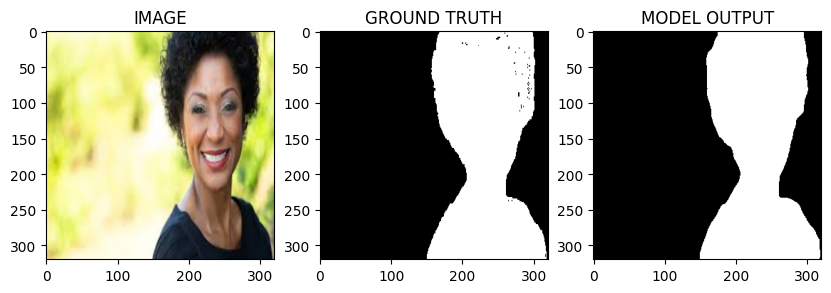

In [58]:
helper.show_image(image,mask ,pred_mask.detach().cpu().squeeze(0))

# For updates about upcoming and current guided projects follow me on...

Twitter : @parth_AI

Linkedin : www.linkedin.com/in/pdhameliya